# In this notebook I try to find if there is some transfromation or combination of features that could help explain more

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../data/Cleaned_data_train.csv")

In [23]:
df_drop = df.drop(labels=["Area_A", "Area_B", "Area_C", "Area_D", "Area_E", "Area_F"], axis = 1)

In [24]:
df_clean = df_drop[df_drop["Exposure"] <= 1]
df_clean

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,VehBrand_B1,VehBrand_B10,VehBrand_B11,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0,0.43,7,18,36,95,1054,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.10,7,17,80,95,598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.33,7,3,36,76,4172,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.56,5,4,73,52,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.27,8,0,37,50,3021,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542406,0,0.06,10,14,34,60,685,0,0,0,...,0,0,1,0,0,0,0,0,0,0
542407,0,0.34,6,8,32,95,242,0,0,0,...,0,0,0,0,0,1,0,0,0,0
542408,0,0.72,9,7,39,72,3301,0,0,0,...,0,0,0,1,0,0,0,0,0,0


I will be looking most at exposure, vehicle power, vehicle age, driver age, bonusMalus and density as the others are more categorical values and is therefore hard to do transformations on and combinations.

In [33]:
zero = df_clean[df_clean["ClaimNb"] == 0]
more = df_clean[df_clean["ClaimNb"] > 0]

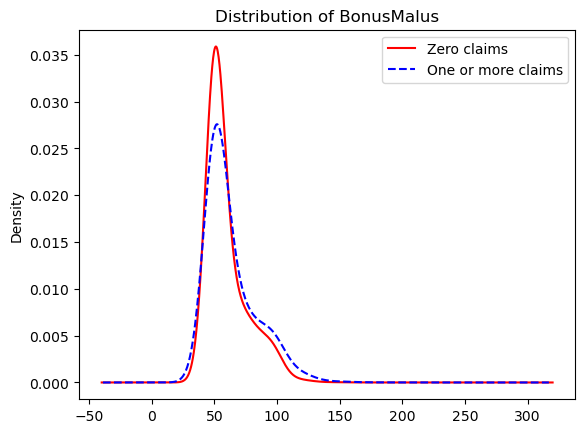

In [ ]:


zero["BonusMalus"].plot.kde(bw_method=0.5, color="red", linestyle="-", label = "Zero claims")
more["BonusMalus"].plot.kde(bw_method=0.5, color="blue", linestyle="-", label = "One or more claims")
plt.title("Distribution of BonusMalus")
plt.legend()
plt.show()

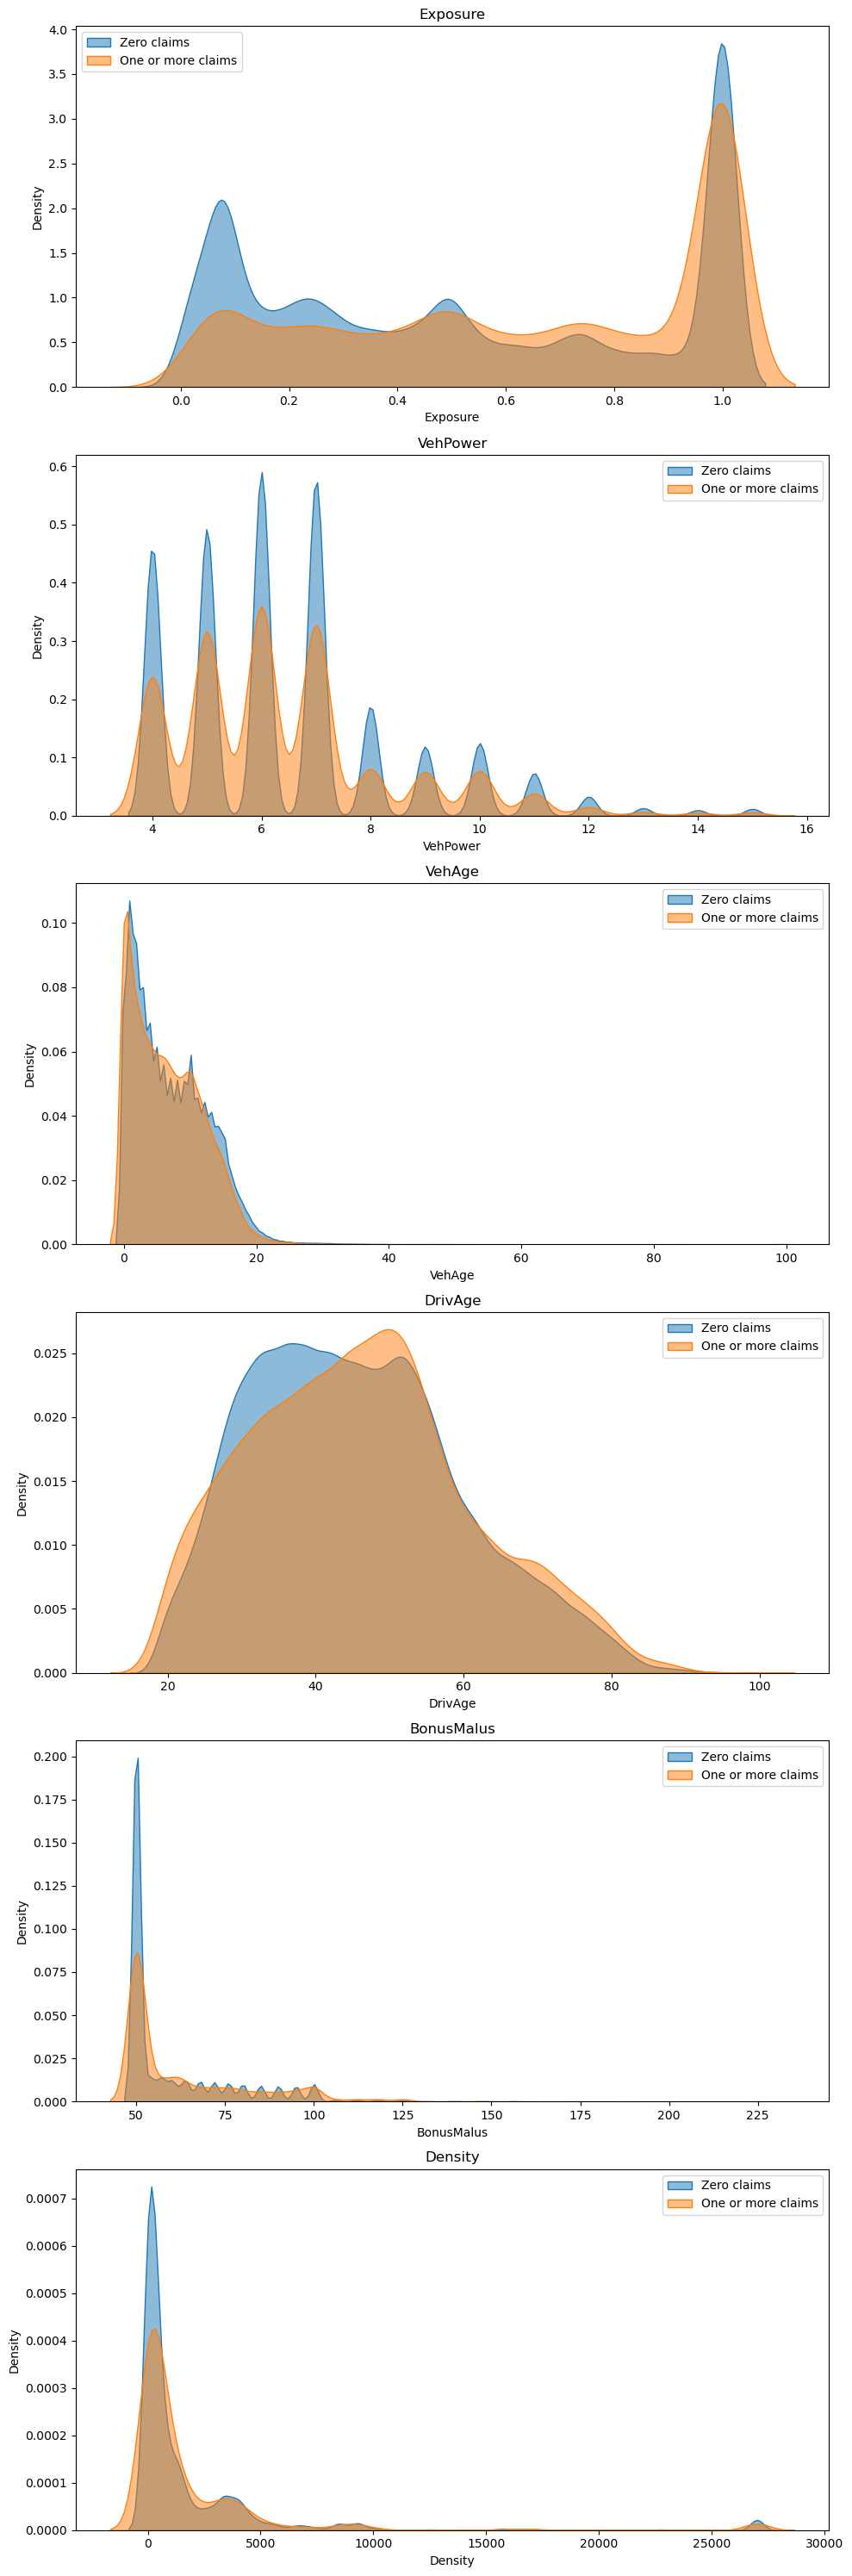

In [53]:
fig, ax = plt.subplots(6, 1, figsize=(10, 30))

feature_list = ["Exposure", "VehPower", "VehAge",
                "DrivAge", "BonusMalus", "Density"]

for i, feature in enumerate(feature_list):
    sns.kdeplot(
        data=zero,
        x=feature,
        fill=True,
        alpha=0.5,
        ax=ax[i],
        label="Zero claims"
    )
    sns.kdeplot(
        data=more,
        x=feature,
        fill=True,
        alpha=0.5,
        ax=ax[i],
        label="One or more claims"
    )

    ax[i].set_title(feature)
    ax[i].legend()

plt.tight_layout()
plt.show()


In [6]:
df_clean[df_clean["ClaimNb"] > 0]

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,VehBrand_B1,VehBrand_B10,VehBrand_B11,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
36,1,0.78,4,3,50,50,4128,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,2,1.00,7,1,50,50,511,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,1,0.06,4,0,52,55,5433,0,0,0,...,0,0,0,0,0,0,0,0,1,0
88,1,0.08,6,2,49,95,824,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,1,1.00,6,6,44,62,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542324,1,0.66,7,9,26,100,26,0,0,0,...,0,0,0,0,0,1,0,0,0,0
542363,1,1.00,10,9,89,50,91,1,0,0,...,0,0,0,0,0,0,0,0,0,0
542364,1,0.09,7,4,37,82,1326,0,0,0,...,0,0,0,0,0,0,0,0,1,0
542371,1,0.24,9,0,69,50,27000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
claims = []
procentages = []
total = len(df_clean)
for claim in sorted(list(df_clean["ClaimNb"].unique())):
    procentage = len(df_clean[df_clean["ClaimNb"] == claim]) / total * 100
    claims.append(claim)
    procentages.append(procentage)

percent = (pd.DataFrame({"Number of claims": claims,"procentages": procentages}))

In [20]:
percent

,Number of claims,procentages
0,0,94.981678
1,1,4.742933
2,2,0.261167
3,3,0.012375
4,4,0.000739
5,5,0.000369
6,6,0.000185
7,9,0.000185
8,11,0.000369


In [6]:
df_keep = df_clean[["ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]]
df_keep

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
0,0,0.43,7,18,36,95,1054
1,0,0.10,7,17,80,95,598
2,0,0.33,7,3,36,76,4172
3,0,0.56,5,4,73,52,15
4,0,0.27,8,0,37,50,3021
...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314
542406,0,0.06,10,14,34,60,685
542407,0,0.34,6,8,32,95,242
542408,0,0.72,9,7,39,72,3301


In [23]:
feature_list = ["ClaimNb", "Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]

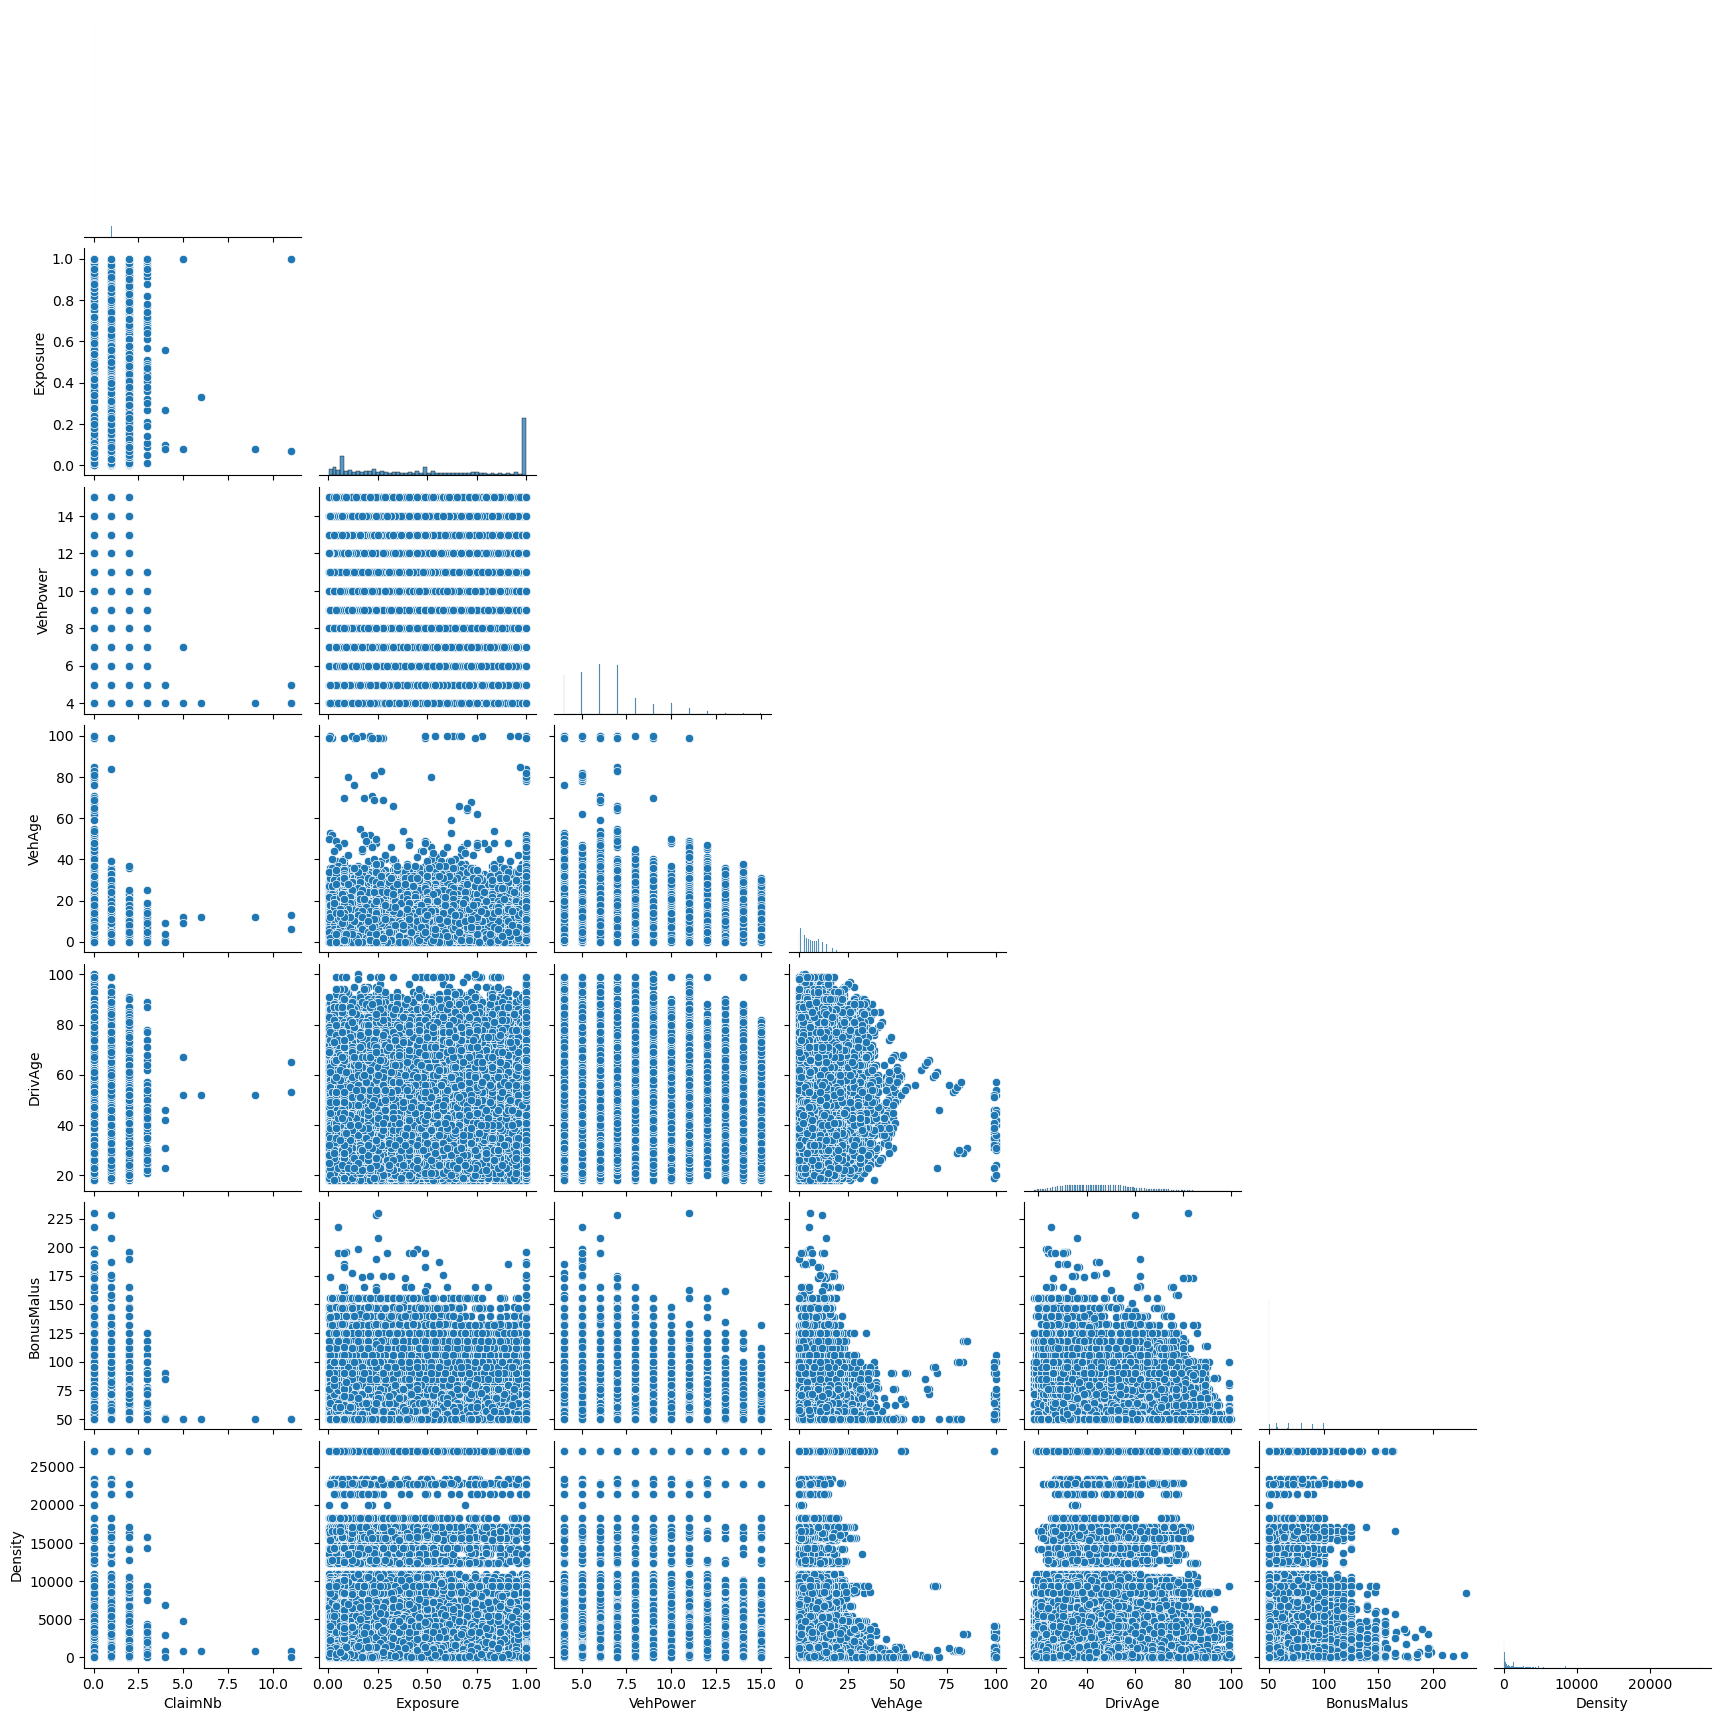

In [8]:
sns.pairplot(df_keep, corner = True)

In [9]:
df_keep[df_keep["Exposure"] > 1]

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density


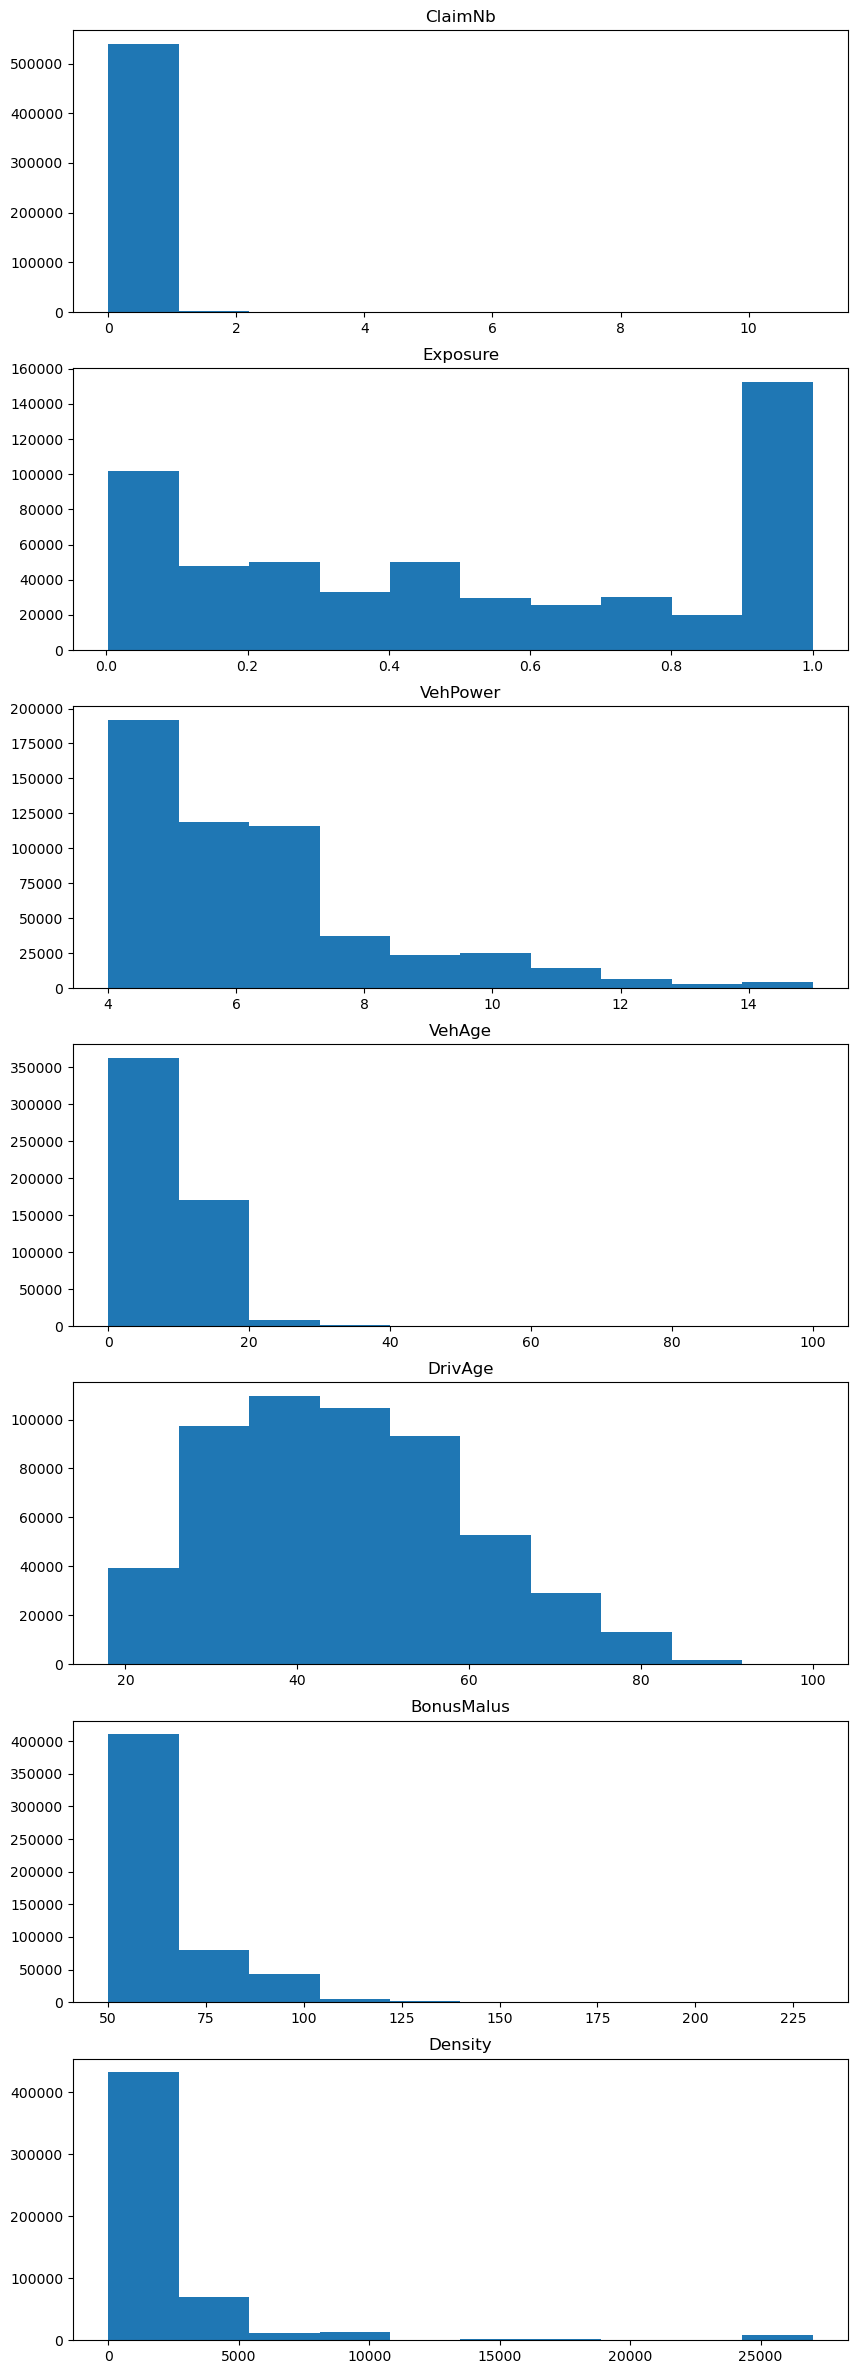

In [10]:
fig, ax = plt.subplots(7,1,figsize = (10,30))

count = 0

for feature in feeature_list:
    ax[count].hist(df_keep[feature])
    ax[count].set_title(feature)
    count += 1

plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


The models performance without any change in features

In [12]:
# remember that we use df_clean to get the whole dataset and not just the ones you were interested in combining and transforming
y = df_clean["ClaimNb"]
X = df_clean.drop(labels = ["ClaimNb"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2004)
X

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0.43,7,18,36,95,1054,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.10,7,17,80,95,598,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.33,7,3,36,76,4172,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.56,5,4,73,52,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.27,8,0,37,50,3021,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0.20,6,10,32,76,1314,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542406,0.06,10,14,34,60,685,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
542407,0.34,6,8,32,95,242,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
542408,0.72,9,7,39,72,3301,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
regressor = DecisionTreeRegressor(min_impurity_decrease=0, max_depth=5)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [14]:
mean_squared_error(y_test, y_pred)

0.05431102109925901

In [15]:
print("The depth of the tree is:", regressor.get_depth())
print("Number of leaves in the tree is:", regressor.get_n_leaves())

The depth of the tree is: 5
Number of leaves in the tree is: 32


In [16]:
regressor.cost_complexity_pruning_path(X_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 1.47094412e-06, 2.44440246e-06, 2.57551103e-06,
        2.59800313e-06, 3.28869645e-06, 4.33493516e-06, 6.26994920e-06,
        7.12486190e-06, 1.04297937e-05, 1.16220845e-05, 1.20810482e-05,
        1.21543020e-05, 1.26247323e-05, 1.81052427e-05, 1.82084494e-05,
        2.34134648e-05, 2.62284909e-05, 3.23149995e-05, 3.68792995e-05,
        3.92068656e-05, 5.59820045e-05, 6.05490193e-05, 6.52243519e-05,
        9.12243547e-05, 1.11489827e-04, 1.32802664e-04, 1.52923344e-04,
        2.49470852e-04]),
 'impurities': array([0.05582336, 0.05582483, 0.05582727, 0.05582985, 0.05583505,
        0.05583833, 0.05584267, 0.05584894, 0.05585606, 0.05586649,
        0.05587812, 0.0558902 , 0.05590235, 0.05591498, 0.05593308,
        0.05595129, 0.0559747 , 0.05600093, 0.05603325, 0.05607013,
        0.05610933, 0.05616532, 0.05622586, 0.05635631, 0.05644754,
        0.05655903, 0.05669183, 0.05684475, 0.05734369])}

[Text(0.5, 0.9, 'x[0] <= 0.545\nsquared_error = 0.057\nsamples = 433132\nvalue = 0.053'),
 Text(0.25, 0.7, 'x[2] <= 0.5\nsquared_error = 0.043\nsamples = 237806\nvalue = 0.039'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[9] <= 0.5\nsquared_error = 0.085\nsamples = 29591\nvalue = 0.083'),
 Text(0.0625, 0.3, 'x[0] <= 0.115\nsquared_error = 0.033\nsamples = 9945\nvalue = 0.032'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[1] <= 6.5\nsquared_error = 0.11\nsamples = 19646\nvalue = 0.109'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[0] <= 0.125\nsquared_error = 0.036\nsamples = 208215\nvalue = 0.033'),
 Text(0.3125, 0.3, 'x[4] <= 94.5\nsquared_error = 0.022\nsamples = 75792\nvalue = 0.018'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[4] <= 95.5\nsquared_error = 0.045\nsamples = 132423\nvalue = 0.041'),
 Text(0.40625, 0.1, 

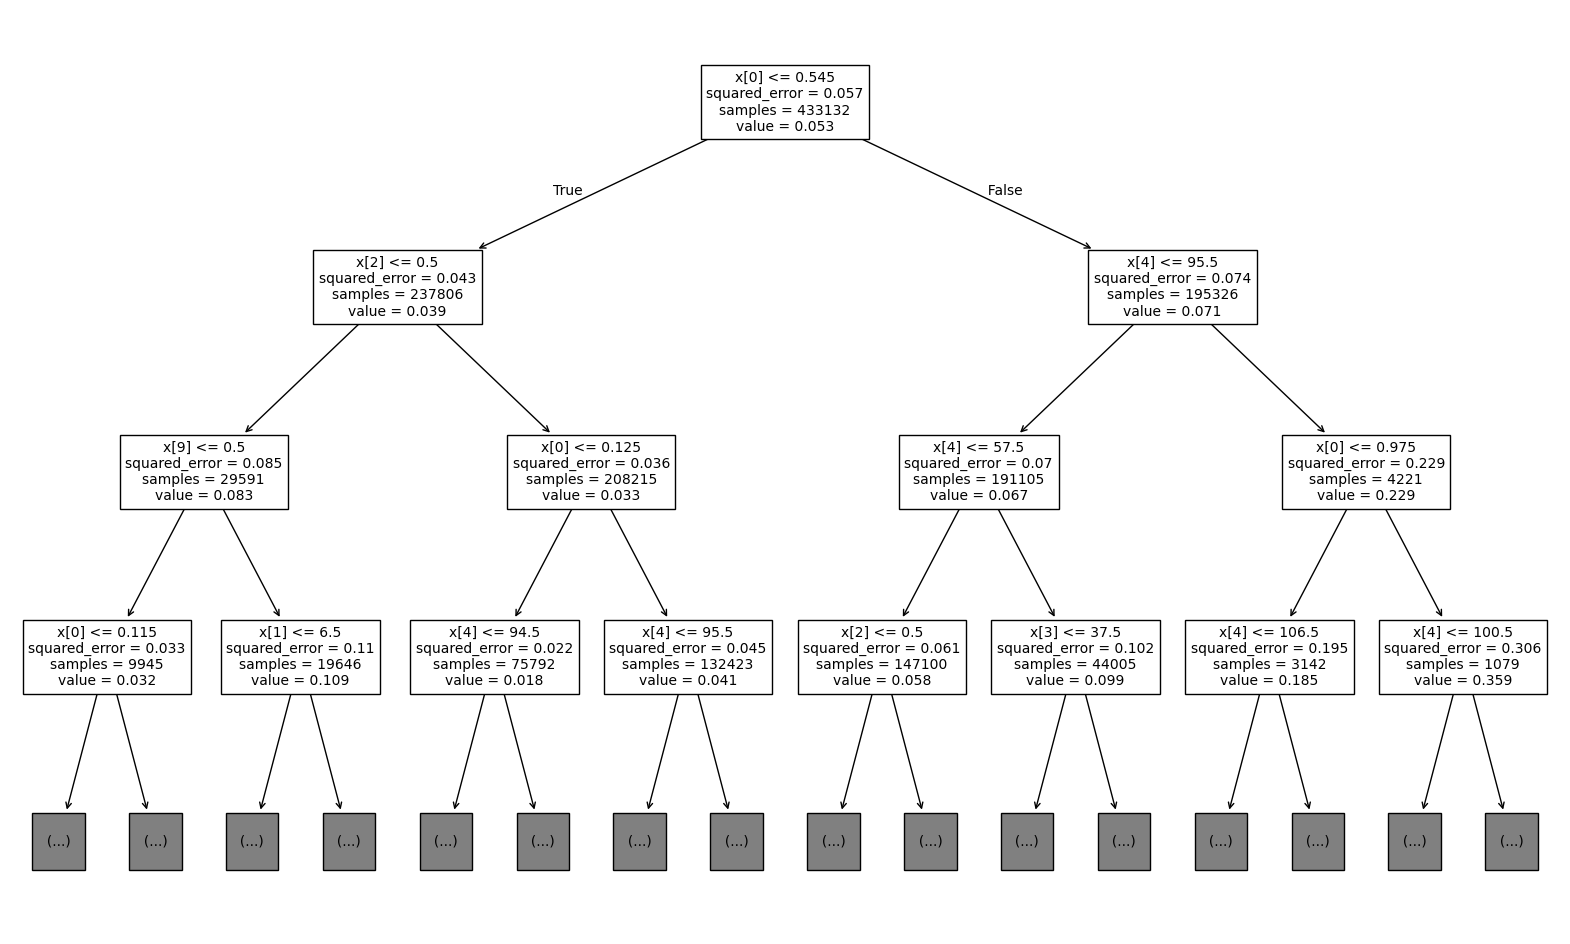

In [17]:
plt.figure(figsize=(20,12))
plot_tree(regressor, max_depth=3, fontsize=10)

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = (cross_val_score(regressor,X,y, cv=kf,scoring="r2"))

print("Cross-validation scores:", scores)
print("Mean:", np.mean(scores))


Cross-validation scores: [0.02313726 0.02603821 0.02669759 0.02309544 0.02483872]
Mean: 0.024761445321540832


Let's try to combine density and bonus malus to see if we get better results

In [18]:
df_DenMal = df_clean

df_DenMal["DenMal"] = df_DenMal["Density"] + df_DenMal["BonusMalus"]
df_DenMal = df_DenMal.drop(labels=["Density", "BonusMalus"], axis=1)
df_DenMal

C:\Users\nikol\AppData\Local\Temp\ipykernel_9916\3786000669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DenMal["DenMal"] = df_DenMal["Density"] + df_DenMal["BonusMalus"]


,ClaimNb,Exposure,VehPower,VehAge,DrivAge,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,...,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94,DenMal
0,0,0.43,7,18,36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1149
1,0,0.10,7,17,80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,693
2,0,0.33,7,3,36,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4248
3,0,0.56,5,4,73,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,67
4,0,0.27,8,0,37,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1390
542406,0,0.06,10,14,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,745
542407,0,0.34,6,8,32,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,337
542408,0,0.72,9,7,39,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3373


In [19]:
y_alt = df_DenMal["ClaimNb"]
X_alt = df_DenMal.drop(labels = ["ClaimNb"], axis = 1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = (cross_val_score(regressor,X_alt,y_alt, cv=kf,scoring="neg_mean_squared_error"))

print("Cross-validation scores:", scores)
print("Mean:", np.mean(scores))

Cross-validation scores: [-0.05503484 -0.05770726 -0.057186   -0.05384005 -0.0572121 ]
Mean: -0.05619604973559811


The results with the new feature did not improve the models performance by any means.

Lets try with density and driver age

In [21]:
df_DenAge = df_clean

df_DenAge["Density and Age"] = df_DenAge["Density"] + df_DenAge["DrivAge"]
df_DenAge = df_DenAge.drop(labels=["Density", "DrivAge"], axis=1)
df_DenAge

C:\Users\nikol\AppData\Local\Temp\ipykernel_11004\3442732901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DenAge["Density and Age"] = df_DenAge["Density"] + df_DenAge["DrivAge"]


,ClaimNb,Exposure,VehPower,VehAge,BonusMalus,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,...,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94,DenMal,Density and Age
0,0,0.43,7,18,95,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1149,1090
1,0,0.10,7,17,95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,693,678
2,0,0.33,7,3,76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4248,4208
3,0,0.56,5,4,52,0,0,0,0,1,...,0,0,0,0,0,0,0,0,67,88
4,0,0.27,8,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3071,3058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1390,1346
542406,0,0.06,10,14,60,0,0,0,0,0,...,1,0,0,0,0,0,0,0,745,719
542407,0,0.34,6,8,95,0,0,0,0,0,...,0,0,0,1,0,0,0,0,337,274
542408,0,0.72,9,7,72,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3373,3340


In [22]:
y_alt = df_DenAge["ClaimNb"]
X_alt = df_DenAge.drop(labels = ["ClaimNb"], axis = 1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = (cross_val_score(regressor,X_alt,y_alt, cv=kf,scoring="neg_mean_squared_error"))

print("Cross-validation scores:", scores)
print("Mean:", np.mean(scores))

Cross-validation scores: [-0.0544136  -0.05711248 -0.05657268 -0.05349781 -0.05664858]
Mean: -0.05564903209501317


In [26]:
regressor = DecisionTreeRegressor(min_impurity_decrease=0, max_depth=5)
features = ["Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]
best_mean = 0.024761445321540832
score_values = [0]
combination = ["",""]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for feature1 in features:
    for feature2 in features:
        if feature1 == feature2:
            continue
        df_alt = df_clean
        df_alt["combined"] = df_alt[feature1] + df_alt[feature2]

        y_alt = df_alt["ClaimNb"]
        X_alt = df_alt.drop(labels = ["ClaimNb"], axis = 1)

        scores = (cross_val_score(regressor,X_alt,y_alt, cv=kf,scoring="r2"))

        mean_scores = np.mean(scores)

        if mean_scores > best_mean:
            best_mean = mean_scores
            combination[0] = feature1
            combination[1] = feature2
            score_values[0] = scores

print("Cross-validation scores:", score_values)
print("Best_Mean:", np.mean(best_mean))
print("Feature combination:", combination)


        

C:\Users\nikol\AppData\Local\Temp\ipykernel_9916\2383548325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alt["combined"] = df_alt[feature1] + df_alt[feature2]
C:\Users\nikol\AppData\Local\Temp\ipykernel_9916\2383548325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alt["combined"] = df_alt[feature1] + df_alt[feature2]
C:\Users\nikol\AppData\Local\Temp\ipykernel_9916\2383548325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

KeyboardInterrupt: 

In [33]:
regressor = DecisionTreeRegressor(min_impurity_decrease=0, max_depth=5)
features = ["Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]
best_mean = 0.024761445321540832
best_scores = None
best_combination = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for feature1 in features:
    for feature2 in features:
        if feature1 == feature2:
            continue
        
        # ❗ FIX: use .copy()
        df_alt = df_clean.copy()
        df_alt["combined"] = df_alt[feature1] + df_alt[feature2]

        y_alt = df_alt["ClaimNb"]
        X_alt = df_alt.drop(labels=["ClaimNb"], axis=1)

        scores = cross_val_score(regressor, X_alt, y_alt, cv=kf, scoring="r2")
        mean_score = np.mean(scores)

        if mean_score > best_mean:
            best_mean = mean_score
            best_combination = (feature1, feature2)
            best_scores = scores

print("Best CV scores:", best_scores)
print("Best Mean R²:", best_mean)
print("Best Feature Combination:", best_combination)


Best CV scores: [0.0232689  0.02603821 0.0268628  0.02318331 0.02447723]
Best Mean R²: 0.02476609064147166
Best Feature Combination: ('DrivAge', 'VehPower')


In [ ]:
l = ["",""]

l[0] = "dick"

l

['dick', '']

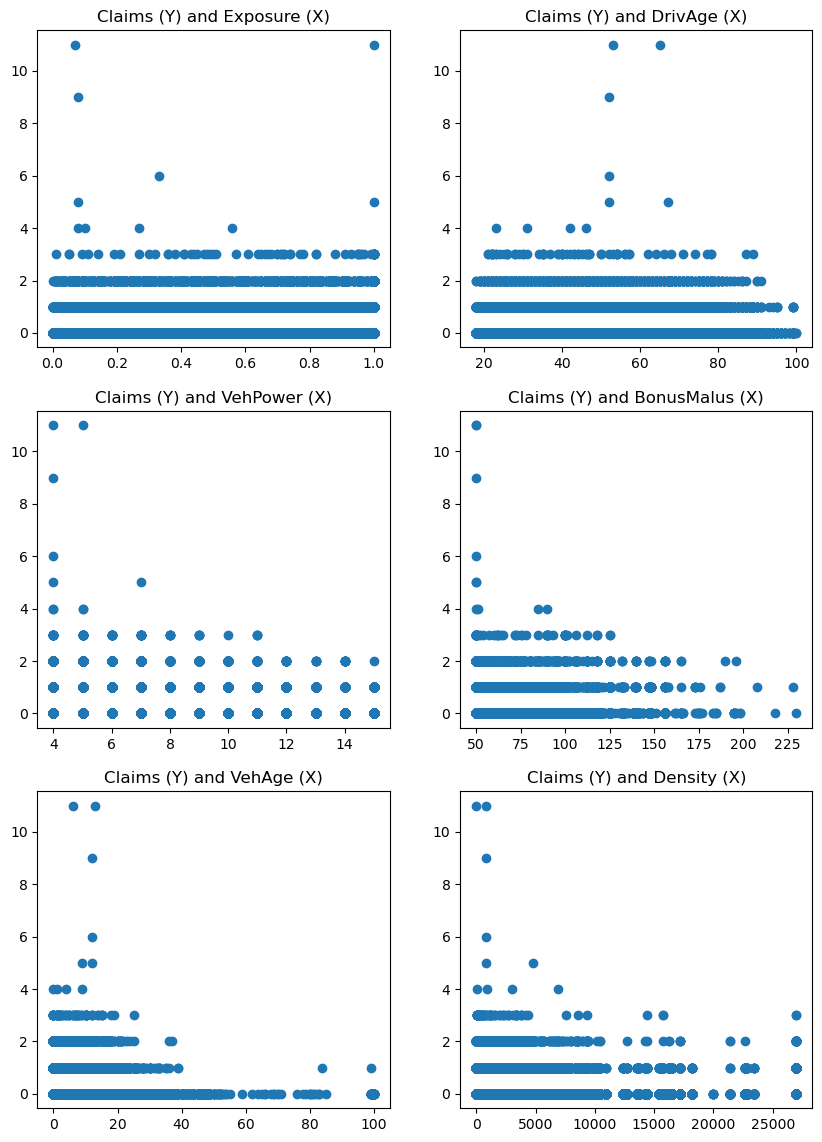

In [24]:
fig, ax = plt.subplots(3,2,figsize = (10,14))

l = ["Exposure", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]
row = 0
column = 0

for feature in l:
    if row == 3:
        row = 0
        column = 1
    ax[row, column].scatter(df_keep[feature],df_keep["ClaimNb"])
    ax[row,column].set_title(f"Claims (Y) and {feature} (X)")
    row += 1


plt.show()

It looks like there is this relation of low values of x have high y-value and then it drops fast but slows more and more down until it then curves towards a constant y-value. It reminds of the curve that 1/x gives. I will try implement a transformation of this function on the relevant features and see how this changes the structure of the data.

In [25]:
# We try first with bonus malus. Make always sure there are no zeroes in that column as you can't divide with zero and will therefore get an error
(df['BonusMalus'] == 0).any()

# It return false meaning that there are no zeroes in this column.

np.False_

In [26]:
df_keep['transformed_BonusMalus'] = df_keep['BonusMalus'].apply(lambda x: 1/x if x != 0 else 0)
df_keep

C:\Users\nikol\AppData\Local\Temp\ipykernel_11004\3038999046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['transformed_BonusMalus'] = df_keep['BonusMalus'].apply(lambda x: 1/x if x != 0 else 0)


,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,transformed_BonusMalus
0,0,0.43,7,18,36,95,1054,0.010526
1,0,0.10,7,17,80,95,598,0.010526
2,0,0.33,7,3,36,76,4172,0.013158
3,0,0.56,5,4,73,52,15,0.019231
4,0,0.27,8,0,37,50,3021,0.020000
...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314,0.013158
542406,0,0.06,10,14,34,60,685,0.016667
542407,0,0.34,6,8,32,95,242,0.010526
542408,0,0.72,9,7,39,72,3301,0.013889


C:\Users\nikol\AppData\Local\Temp\ipykernel_11004\670624667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['transformed_BonusMalus'] = df_keep['BonusMalus'].apply(lambda x: 0.1/(x-49.5) if x != 0 else 0)


Text(0.5, 0, 'Value')

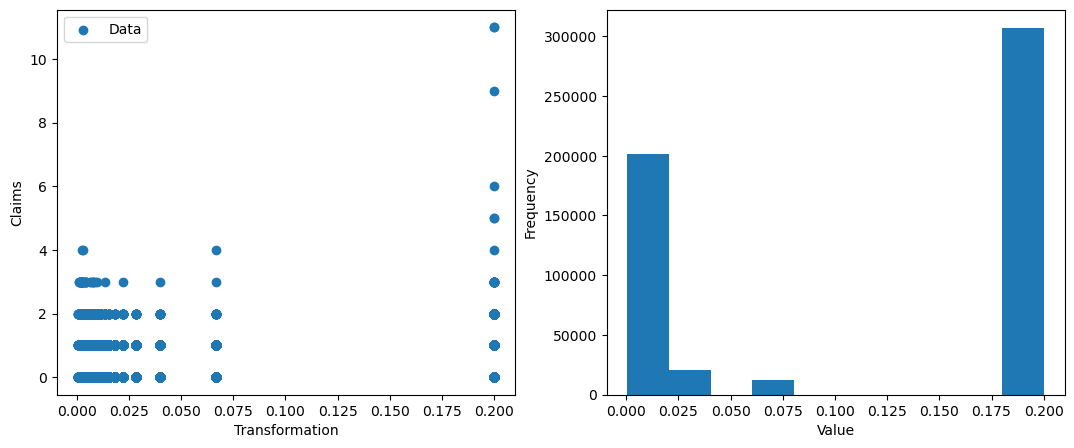

In [59]:
from scipy.stats import linregress

df_keep['transformed_BonusMalus'] = df_keep['BonusMalus'].apply(lambda x: 0.1/(x-49.5) if x != 0 else 0)


fig, ax = plt.subplots(1,2,figsize = (13,5))

ax[0].scatter(df_keep["transformed_BonusMalus"], df_keep["ClaimNb"], label = "Data")
ax[0].set_ylabel("Claims")
ax[0].set_xlabel("Transformation")
ax[0].legend()
ax[1].hist(df_keep["transformed_BonusMalus"])
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Value")

Let's try and see how model performs with this.

Original model results:

Cross-validation scores: [-0.05442429 -0.05705633 -0.05652463 -0.05345828 -0.05666572]

Mean: -0.055625850815967624

In [ ]:
df_transformed = df_clean
df_transformed['transformed_BonusMalus'] = df_transformed['BonusMalus'].apply(lambda x: 2/(x-49)+1 if x != 0 else 0)
df_transformed = df_transformed.drop(labels=["BonusMalus"], axis = 1)
df_transformed


C:\Users\nikol\AppData\Local\Temp\ipykernel_23500\2585860214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['transformed_BonusMalus'] = df_transformed['BonusMalus'].apply(lambda x: 2/(x-49)+1 if x != 0 else 0)


,ClaimNb,Exposure,VehPower,VehAge,DrivAge,Density,VehBrand_B1,VehBrand_B10,VehBrand_B11,VehBrand_B12,...,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94,transformed_BonusMalus
0,0,0.43,7,18,36,1054,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.043478
1,0,0.10,7,17,80,598,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.043478
2,0,0.33,7,3,36,4172,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.074074
3,0,0.56,5,4,73,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.666667
4,0,0.27,8,0,37,3021,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,1314,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.074074
542406,0,0.06,10,14,34,685,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.181818
542407,0,0.34,6,8,32,242,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.043478
542408,0,0.72,9,7,39,3301,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.086957


In [ ]:
DesicionTree = DecisionTreeRegressor(min_impurity_decrease=0)
y_transformed = df_transformed["ClaimNb"]
X_transformed = df_transformed.drop(labels = ["ClaimNb"], axis = 1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = (cross_val_score(regressor,X_transformed,y_transformed, cv=kf,scoring="neg_mean_squared_error"))

print("Cross-validation scores:", scores)
print("Mean:", np.mean(scores))


Cross-validation scores: [-0.05442429 -0.05705633 -0.05652463 -0.0534491  -0.05666572]
Mean: -0.05562401580193739


Here we want to look at the relation between training error and test error

In [ ]:
x_graph = list(range(1,21))
y_graph_test = []
y_graph_train = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2004)

for depth in range(1,21):
    model = DecisionTreeRegressor(max_depth=depth)

    X = df_clean.drop("ClaimNb", axis=1)

    y = df_clean["ClaimNb"]

    model.fit(X_train,y_train)

    y_pred_test = model.predict(X_test)

    y_pred_train = model.predict(X_train)

    MSE_test = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
    MSE_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)

    y_graph_test.append(MSE_test)
    y_graph_train.append(MSE_train)



R² Score: -0.4644


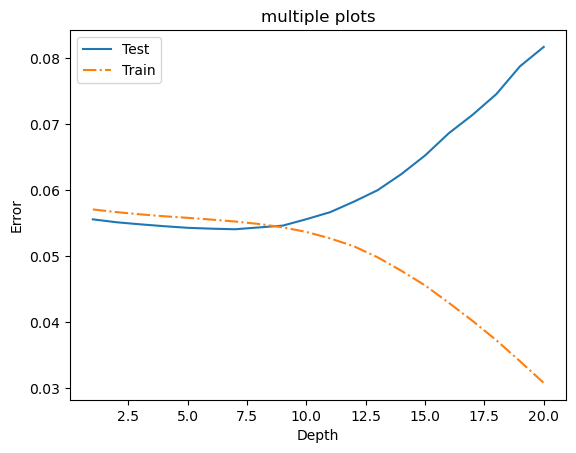

In [36]:
plt.plot(x_graph, y_graph_test, label ='Test')
plt.plot(x_graph, y_graph_train, '-.', label ='Train')

plt.xlabel("Depth")
plt.ylabel("Error")
plt.legend()
plt.title('multiple plots')
plt.show()

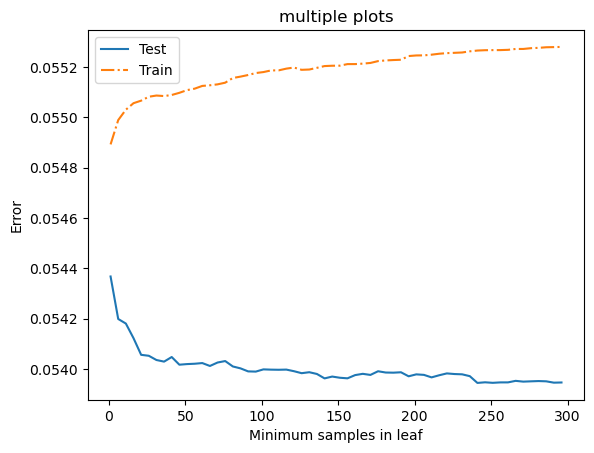

In [43]:
x_graph = list(range(1,301,5))
y_graph_test = []
y_graph_train = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2004)

for samples in range(1,301,5):
    model = DecisionTreeRegressor(max_depth=8, min_samples_leaf= samples)

    X = df_clean.drop("ClaimNb", axis=1)

    y = df_clean["ClaimNb"]

    model.fit(X_train,y_train)

    y_pred_test = model.predict(X_test)

    y_pred_train = model.predict(X_train)

    MSE_test = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
    MSE_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)

    y_graph_test.append(MSE_test)
    y_graph_train.append(MSE_train)

plt.plot(x_graph, y_graph_test, label ='Test')
plt.plot(x_graph, y_graph_train, '-.', label ='Train')

plt.xlabel("Minimum samples in leaf")
plt.ylabel("Error")
plt.legend()
plt.title('multiple plots')
plt.show()

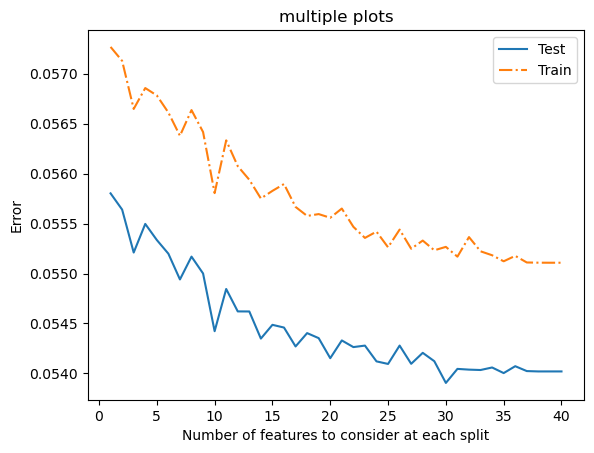

In [48]:
x_graph = list(range(1,41))
y_graph_test = []
y_graph_train = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2004)

for amount in range(1,41):
    model = DecisionTreeRegressor(max_depth=8, min_samples_leaf= 50, max_features=amount)

    X = df_clean.drop("ClaimNb", axis=1)

    y = df_clean["ClaimNb"]

    model.fit(X_train,y_train)

    y_pred_test = model.predict(X_test)

    y_pred_train = model.predict(X_train)

    MSE_test = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
    MSE_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)

    y_graph_test.append(MSE_test)
    y_graph_train.append(MSE_train)

plt.plot(x_graph, y_graph_test, label ='Test')
plt.plot(x_graph, y_graph_train, '-.', label ='Train')

plt.xlabel("Number of features to consider at each split")
plt.ylabel("Error")
plt.legend()
plt.title('multiple plots')
plt.show()

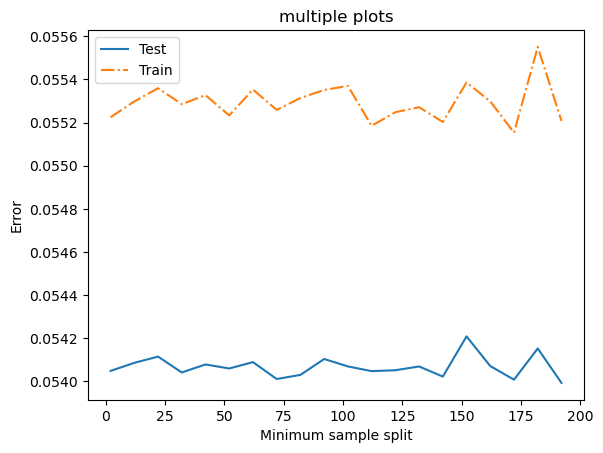

In [56]:

x_graph = list(range(2,202,10))
y_graph_test = []
y_graph_train = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2004)

for minimum in range(2,202,10):
    model = DecisionTreeRegressor(max_depth=8, min_samples_leaf= 50, max_features=30, min_samples_split=minimum)

    X = df_clean.drop("ClaimNb", axis=1)

    y = df_clean["ClaimNb"]

    model.fit(X_train,y_train)

    y_pred_test = model.predict(X_test)

    y_pred_train = model.predict(X_train)

    MSE_test = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
    MSE_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)

    y_graph_test.append(MSE_test)
    y_graph_train.append(MSE_train)

plt.plot(x_graph, y_graph_test, label ='Test')
plt.plot(x_graph, y_graph_train, '-.', label ='Train')

plt.xlabel("Minimum sample split")
plt.ylabel("Error")
plt.legend()
plt.title('multiple plots')
plt.show()